<h2><mark>Needed tools importation</mark></h2>

In [1]:
#basics tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#tensorflow functionnality
import tensorflow as tf
from tensorflow import keras
#sklearn functionnality
from sklearn.model_selection import train_test_split
#image processing tools
import cv2 as cv
import PIL
import pathlib

<h2><mark>Loading data from an url</mark></h2>

In [2]:
url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
datasets=keras.utils.get_file('flower_photos',origin=url,cache_dir='/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/datasets',untar=True)
datasets

'/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/datasets/datasets/flower_photos'

In [3]:
data_dir=pathlib.Path(datasets)
data_dir

PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/datasets/datasets/flower_photos')

<h2><mark>Visualized images</mark></h2>

In [4]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/datasets/datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/datasets/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/datasets/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/datasets/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/datasets/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg')]

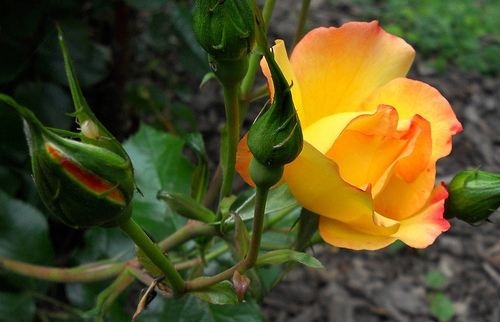

In [5]:
PIL.Image.open(roses[0])

In [6]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

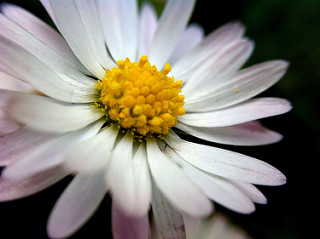

In [7]:
PIL.Image.open(flowers_images_dict['daisy'][0])

<h2><mark>Loading images as a numpy array</mark></h2>

In [8]:
X,y=[],[]
for flowers_names,images in flowers_images_dict.items():
  for image in images:
    img=cv.imread(str(image))
    resized_img=cv.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flowers_names])

KeyboardInterrupt: ignored

In [ ]:
len(X)

In [ ]:
len(y)

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=111)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

<mark><em>Building the model</em></mark>

In [ ]:
data_augmentation=keras.Sequential([
      keras.layers.experimental.preprocessing.RandomZoom(.3),
      keras.layers.experimental.preprocessing.RandomContrast(.2),
      keras.layers.experimental.preprocessing.RandomRotation(.3),
      #keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height, img_width,3))
])

In [ ]:
model=keras.Sequential([
    #data augmentation technics
     data_augmentation,
    #feature extraction
      keras.layers.Conv2D(256,3,strides=(1,1),padding='same',activation='relu'),
      keras.layers.MaxPool2D((2,2)),
      keras.layers.Dropout(.3),
      keras.layers.Conv2D(64,3,strides=(1,1),padding='same',activation='relu'),
      keras.layers.MaxPool2D((2,2)),
      keras.layers.Dropout(.2),
    #classification model
      keras.layers.Flatten(),
      keras.layers.Dense(32,activation='relu'),
      keras.layers.Dense(5,activation='sigmoid')
  ])
  
tb_callback=keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/googleColabStuff/ColabStuff/data/call-back-storage/Adam')

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#model.summary()

In [ ]:
%%timeit -n1 -r1
model.fit(X_train_scaled,y_train,epochs=30,callbacks=[tb_callback])

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/drive/MyDrive/googleColabStuff/ColabStuff/data/call-back-storage/Adam'